<a href="https://colab.research.google.com/github/myndaaa/Natural-Language-Processing/blob/main/FNLP_Tutorial2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COS30018 FNLP Tutorial 2**

##**Lab Task Submission at bottom #PassTask1**
## **Name: Mysha Nahiyan Shemontee**
## **Student ID: 102773618**

**Let's create tokens from documents**

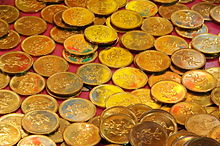

# ⭐**I removed the lab part** ⭐
**Because the file got too long and i had difficulty keeping track of how much i did** 😞

# Lab Submission 1 (Due Sunday Week 3, 11:59 PM)

**Read this article:**
https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4#dfd5

Hamburger text download: https://drive.google.com/file/d/1iDU01jVFr-1EDW3ZvolVLhwWrUig6Qax/view?usp=sharing

1. From what you've learnt above and read in the article, perform tokenization on this hamburger text file. Use at least one method from this tutorial and one method from the online article (not inside this tutorial).

2. Which way is the best form the different methods you've tried? Explain why? (rough length: 50-200 words)

**Optional**:

O1. Checkout tensorflows various tokenizers that have start of the art methods including (BERT based on transformers)
Source: https://colab.research.google.com/github/tensorflow/text/blob/master/docs/guide/tokenizers.ipynb

O2. Try tokenizing other languages (korean, chinese, indian, etc.)





In [31]:
hamburger_text = "A hamburger (or burger for short) is a food, which in American English is considered a sandwich (but not in other English varieties, such as British or Australian, in which the definition of sandwich is narrower),[1] consisting of one or more cooked patties—usually ground meat, typically beef—placed inside a sliced bread roll or bun. The patty may be pan fried, grilled, smoked or flame broiled. Hamburgers are often served with cheese, lettuce, tomato, onion, pickles, bacon, or chilis; condiments such as ketchup, mustard, mayonnaise, relish, or a \"special sauce\", often a variation of Thousand Island dressing; and are frequently placed on sesame seed buns. A hamburger topped with cheese is called a cheeseburger."

In [23]:
#list of symbol s for preproceessing
list_of_symbols = ["™","®","©","&trade;","&reg;","&copy;","&#8482;","&#174;","&#169;","\n"]

In [24]:
#cleaning n processing
#Function to clean and preprocess list
#:param list of words:
#return: List of cleaned word
import string

def textpreprocessing(textprocess):

    #remove the punctuations
    text_to_process = "".join([char for char in textprocess if char not in string.punctuation])

    #remove symbol
    for symbol in list_of_symbols:
        text_to_process = text_to_process.replace(symbol," ")

    #remove unicode
    text_to_process = text_to_process.encode("ascii", "ignore")
    text_to_process = text_to_process.decode()

    return text_to_process

In [17]:
hamburger_text = textpreprocessing(hamburger_text)

print(hamburger_text)

A hamburger or burger for short is a food which in American English is considered a sandwich but not in other English varieties such as British or Australian in which the definition of sandwich is narrower1 consisting of one or more cooked pattiesusually ground meat typically beefplaced inside a sliced bread roll or bun The patty may be pan fried grilled smoked or flame broiled Hamburgers are often served with cheese lettuce tomato onion pickles bacon or chilis condiments such as ketchup mustard mayonnaise relish or a special sauce often a variation of Thousand Island dressing and are frequently placed on sesame seed buns A hamburger topped with cheese is called a cheeseburger


**NLTK method**

In [25]:
!pip install nltk


In [26]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer("[\w']{3,}")
#stopwords.words('english')

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
hamburger_text = "A hamburger (or burger for short) is a food, which in American English is considered a sandwich (but not in other English varieties, such as British or Australian, in which the definition of sandwich is narrower),[1] consisting of one or more cooked patties—usually ground meat, typically beef—placed inside a sliced bread roll or bun. The patty may be pan fried, grilled, smoked or flame broiled. Hamburgers are often served with cheese, lettuce, tomato, onion, pickles, bacon, or chilis; condiments such as ketchup, mustard, mayonnaise, relish, or a \"special sauce\", often a variation of Thousand Island dressing; and are frequently placed on sesame seed buns. A hamburger topped with cheese is called a cheeseburger."

tokenize_list_words = tokenizer.tokenize(hamburger_text)

In [29]:
for item in tokenize_list_words:
    if item in stopwords.words('english'):
        tokenize_list_words.remove(item)

In [30]:
print(tokenize_list_words)

['hamburger', 'burger', 'short', 'food', 'American', 'English', 'considered', 'sandwich', 'not', 'English', 'varieties', 'British', 'Australian', 'the', 'definition', 'sandwich', 'narrower', 'consisting', 'one', 'cooked', 'patties', 'usually', 'ground', 'meat', 'typically', 'beef', 'placed', 'inside', 'sliced', 'bread', 'roll', 'bun', 'The', 'patty', 'may', 'pan', 'fried', 'grilled', 'smoked', 'flame', 'broiled', 'Hamburgers', 'often', 'served', 'cheese', 'lettuce', 'tomato', 'onion', 'pickles', 'bacon', 'chilis', 'condiments', 'ketchup', 'mustard', 'mayonnaise', 'relish', 'special', 'sauce', 'often', 'variation', 'Thousand', 'Island', 'dressing', 'are', 'frequently', 'placed', 'sesame', 'seed', 'buns', 'hamburger', 'topped', 'cheese', 'called', 'cheeseburger']


**Gensim Method**

In [32]:
# Install Gensim
!pip install gensim

In [33]:
# Import necessary libraries
import gensim
from gensim.utils import simple_preprocess

In [34]:
# burger
hamburger_text = """
A hamburger (or burger for short) is a food, which in American English is considered a sandwich (but not in other English varieties, such as British or Australian, in which the definition of sandwich is narrower),[1] consisting of one or more cooked patties—usually ground meat, typically beef—placed inside a sliced bread roll or bun. The patty may be pan fried, grilled, smoked or flame broiled. Hamburgers are often served with cheese, lettuce, tomato, onion, pickles, bacon, or chilis; condiments such as ketchup, mustard, mayonnaise, relish, or a "special sauce", often a variation of Thousand Island dressing; and are frequently placed on sesame seed buns. A hamburger topped with cheese is called a cheeseburger.
"""


In [35]:
# Tokenize using gensim's function
tokens = simple_preprocess(hamburger_text)

In [36]:
# Print the tokens
print(tokens)

['hamburger', 'or', 'burger', 'for', 'short', 'is', 'food', 'which', 'in', 'american', 'english', 'is', 'considered', 'sandwich', 'but', 'not', 'in', 'other', 'english', 'varieties', 'such', 'as', 'british', 'or', 'australian', 'in', 'which', 'the', 'definition', 'of', 'sandwich', 'is', 'narrower', 'consisting', 'of', 'one', 'or', 'more', 'cooked', 'patties', 'usually', 'ground', 'meat', 'typically', 'beef', 'placed', 'inside', 'sliced', 'bread', 'roll', 'or', 'bun', 'the', 'patty', 'may', 'be', 'pan', 'fried', 'grilled', 'smoked', 'or', 'flame', 'broiled', 'hamburgers', 'are', 'often', 'served', 'with', 'cheese', 'lettuce', 'tomato', 'onion', 'pickles', 'bacon', 'or', 'chilis', 'condiments', 'such', 'as', 'ketchup', 'mustard', 'mayonnaise', 'relish', 'or', 'special', 'sauce', 'often', 'variation', 'of', 'thousand', 'island', 'dressing', 'and', 'are', 'frequently', 'placed', 'on', 'sesame', 'seed', 'buns', 'hamburger', 'topped', 'with', 'cheese', 'is', 'called', 'cheeseburger']


# **My opinions**
seeing NLTK videos on YT, I particularly appreciate the built-in feature for removing stop words available in the library. its quite helpful that, list of stop words can be customized, allowing the addition of more words and supporting different languages. this definitely makes analysis a lot better (IMHO). such as during a big data course i learned that in sentiment analysis, stop words are kinda unnecesary, hence from this point of view, i prefer and see NLTK as more of an advantage to use. apart from this I found it easier to understand the nltk parts dr joel taught in the top part of this ipynb.  

# Optional

In [42]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3


In [43]:
import tensorflow as tf
from transformers import BertTokenizer

In [44]:
# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [47]:
#using dr joel burger sentence
sentence = "A hamburger or burger for short is a food, which in American English is considered a sandwich but not in other English varieties, such as British or Australian, in which the definition of sandwich is narrower"

In [48]:
tokens = tokenizer.tokenize(sentence)

print("Original Sentence:", sentence)
print("Tokenized Sentence:", tokens)

Original Sentence: A hamburger or burger for short is a food, which in American English is considered a sandwich but not in other English varieties, such as British or Australian, in which the definition of sandwich is narrower
Tokenized Sentence: ['a', 'hamburger', 'or', 'burger', 'for', 'short', 'is', 'a', 'food', ',', 'which', 'in', 'american', 'english', 'is', 'considered', 'a', 'sandwich', 'but', 'not', 'in', 'other', 'english', 'varieties', ',', 'such', 'as', 'british', 'or', 'australian', ',', 'in', 'which', 'the', 'definition', 'of', 'sandwich', 'is', 'narrower']


# Tokenization with my first n second language

*   French
*   Bangla



In [39]:
# french
#texte: Pourquoi est-ce que le crocodile a été recalé à son examen de conduite ? Parce qu'il est toujours en train de faire des crocodiles !
français = "Pourquoi est-ce que le crocodile a été recalé à son examen de conduite ? Parce qu'il est toujours en train de faire des crocodiles !"

In [40]:
from nltk.tokenize import RegexpTokenizer

tokenize_list_words = tokenizer.tokenize(français)

tokenize_list_words

['Pourquoi',
 'est',
 'que',
 'crocodile',
 'été',
 'recalé',
 'son',
 'examen',
 'conduite',
 'Parce',
 "qu'il",
 'est',
 'toujours',
 'train',
 'faire',
 'des',
 'crocodiles']

**Hmm looks good**

In [37]:
# bangla
# text: বাবা: বেটা, তুমি খুব অলস। তুমি আমার একটি গল্প শেষ করতে অনেক সময় লাগিয়েছ। বেটা: হ্যাঁ, বাবা, আমি খুব অলস। আমি তো আপনার মতো একজন সুপারহিরো নয়।
bangla = "বাবা: বেটা, তুমি খুব অলস। তুমি আমার একটি গল্প শেষ করতে অনেক সময় লাগিয়েছ। বেটা: হ্যাঁ, বাবা, আমি খুব অলস। আমি তো আপনার মতো একজন সুপারহিরো নয়।"

In [41]:
from nltk.tokenize import RegexpTokenizer

tokenize_list_words = tokenizer.tokenize(bangla)

tokenize_list_words

['অলস', 'একট', 'করত', 'সময', 'অলস', 'আপন', 'একজন']

hmm looks bad, couldnt detect all words, i believe its primarily due to the fact that regez tokenizer supports english texts, as we write french with english letters except letters with accents, it paired up ok with french, but bangla uses a completely different script and the library dont support it. I havent done enough research on what other tokenizing library might be out there that supports non anglo scripts.